In [3]:
import logging
import click
import numpy 
import cv2
import pytesseract
import re

In [2]:
import os.path
filename = '/var/folders/j3/v2lbykt50tz3lb2m64_xz63m0000gn/T/ipykernel_58402/1002776789.py'
extension = os.path.splitext(filename)[1]

In [3]:
extension

'.py'

In [15]:

im = cv2.imread(str(imPath), cv2.IMREAD_COLOR)
newdata=pytesseract.image_to_osd(im)
angle = re.search('(?<=Rotate: )\d+', newdata).group(0)
print(newdata)

def rotate(image, center = None, scale = 1.0):
    angle=360-int(re.search('(?<=Rotate: )\d+', pytesseract.image_to_osd(image)).group(0))
    (h, w) = image.shape[:2]

    if center is None:
        center = (w / 2, h / 2)

    # Perform the rotation
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))

    return rotated

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 1.40
Script: Latin
Script confidence: 4.10



In [4]:
from deskew import determine_skew

In [5]:
import numpy as np
from typing import Union, Tuple
import math

def rota(
        image: np.ndarray, angle: float, background: Union[int, Tuple[int, int, int]]
) -> np.ndarray:
    old_width, old_height = image.shape[:2]
    angle_radian = math.radians(angle)
    width = abs(np.sin(angle_radian) * old_height) + abs(np.cos(angle_radian) * old_width)
    height = abs(np.sin(angle_radian) * old_width) + abs(np.cos(angle_radian) * old_height)

    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    rot_mat[1, 2] += (width - old_width) / 2
    rot_mat[0, 2] += (height - old_height) / 2
    return cv2.warpAffine(image, rot_mat, (int(round(height)), int(round(width))), borderValue=background)

In [65]:
imPath='/Users/makhmood/PycharmProjects/nexus-test/nexus_test/samples/test_scan.jpg'
image = thresholding(get_grayscale(cv2.imread(imPath)))
# grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image.shape)
angle = determine_skew(image)
# back_color = list(image[0][0])
# print(back_color)
rotated = rota(image, angle, [255, 255, 255])
cv2.imwrite('/Users/makhmood/PycharmProjects/nexus-test/nexus_test/samples/deskewed.png', rotated)

(2449, 1913)


True

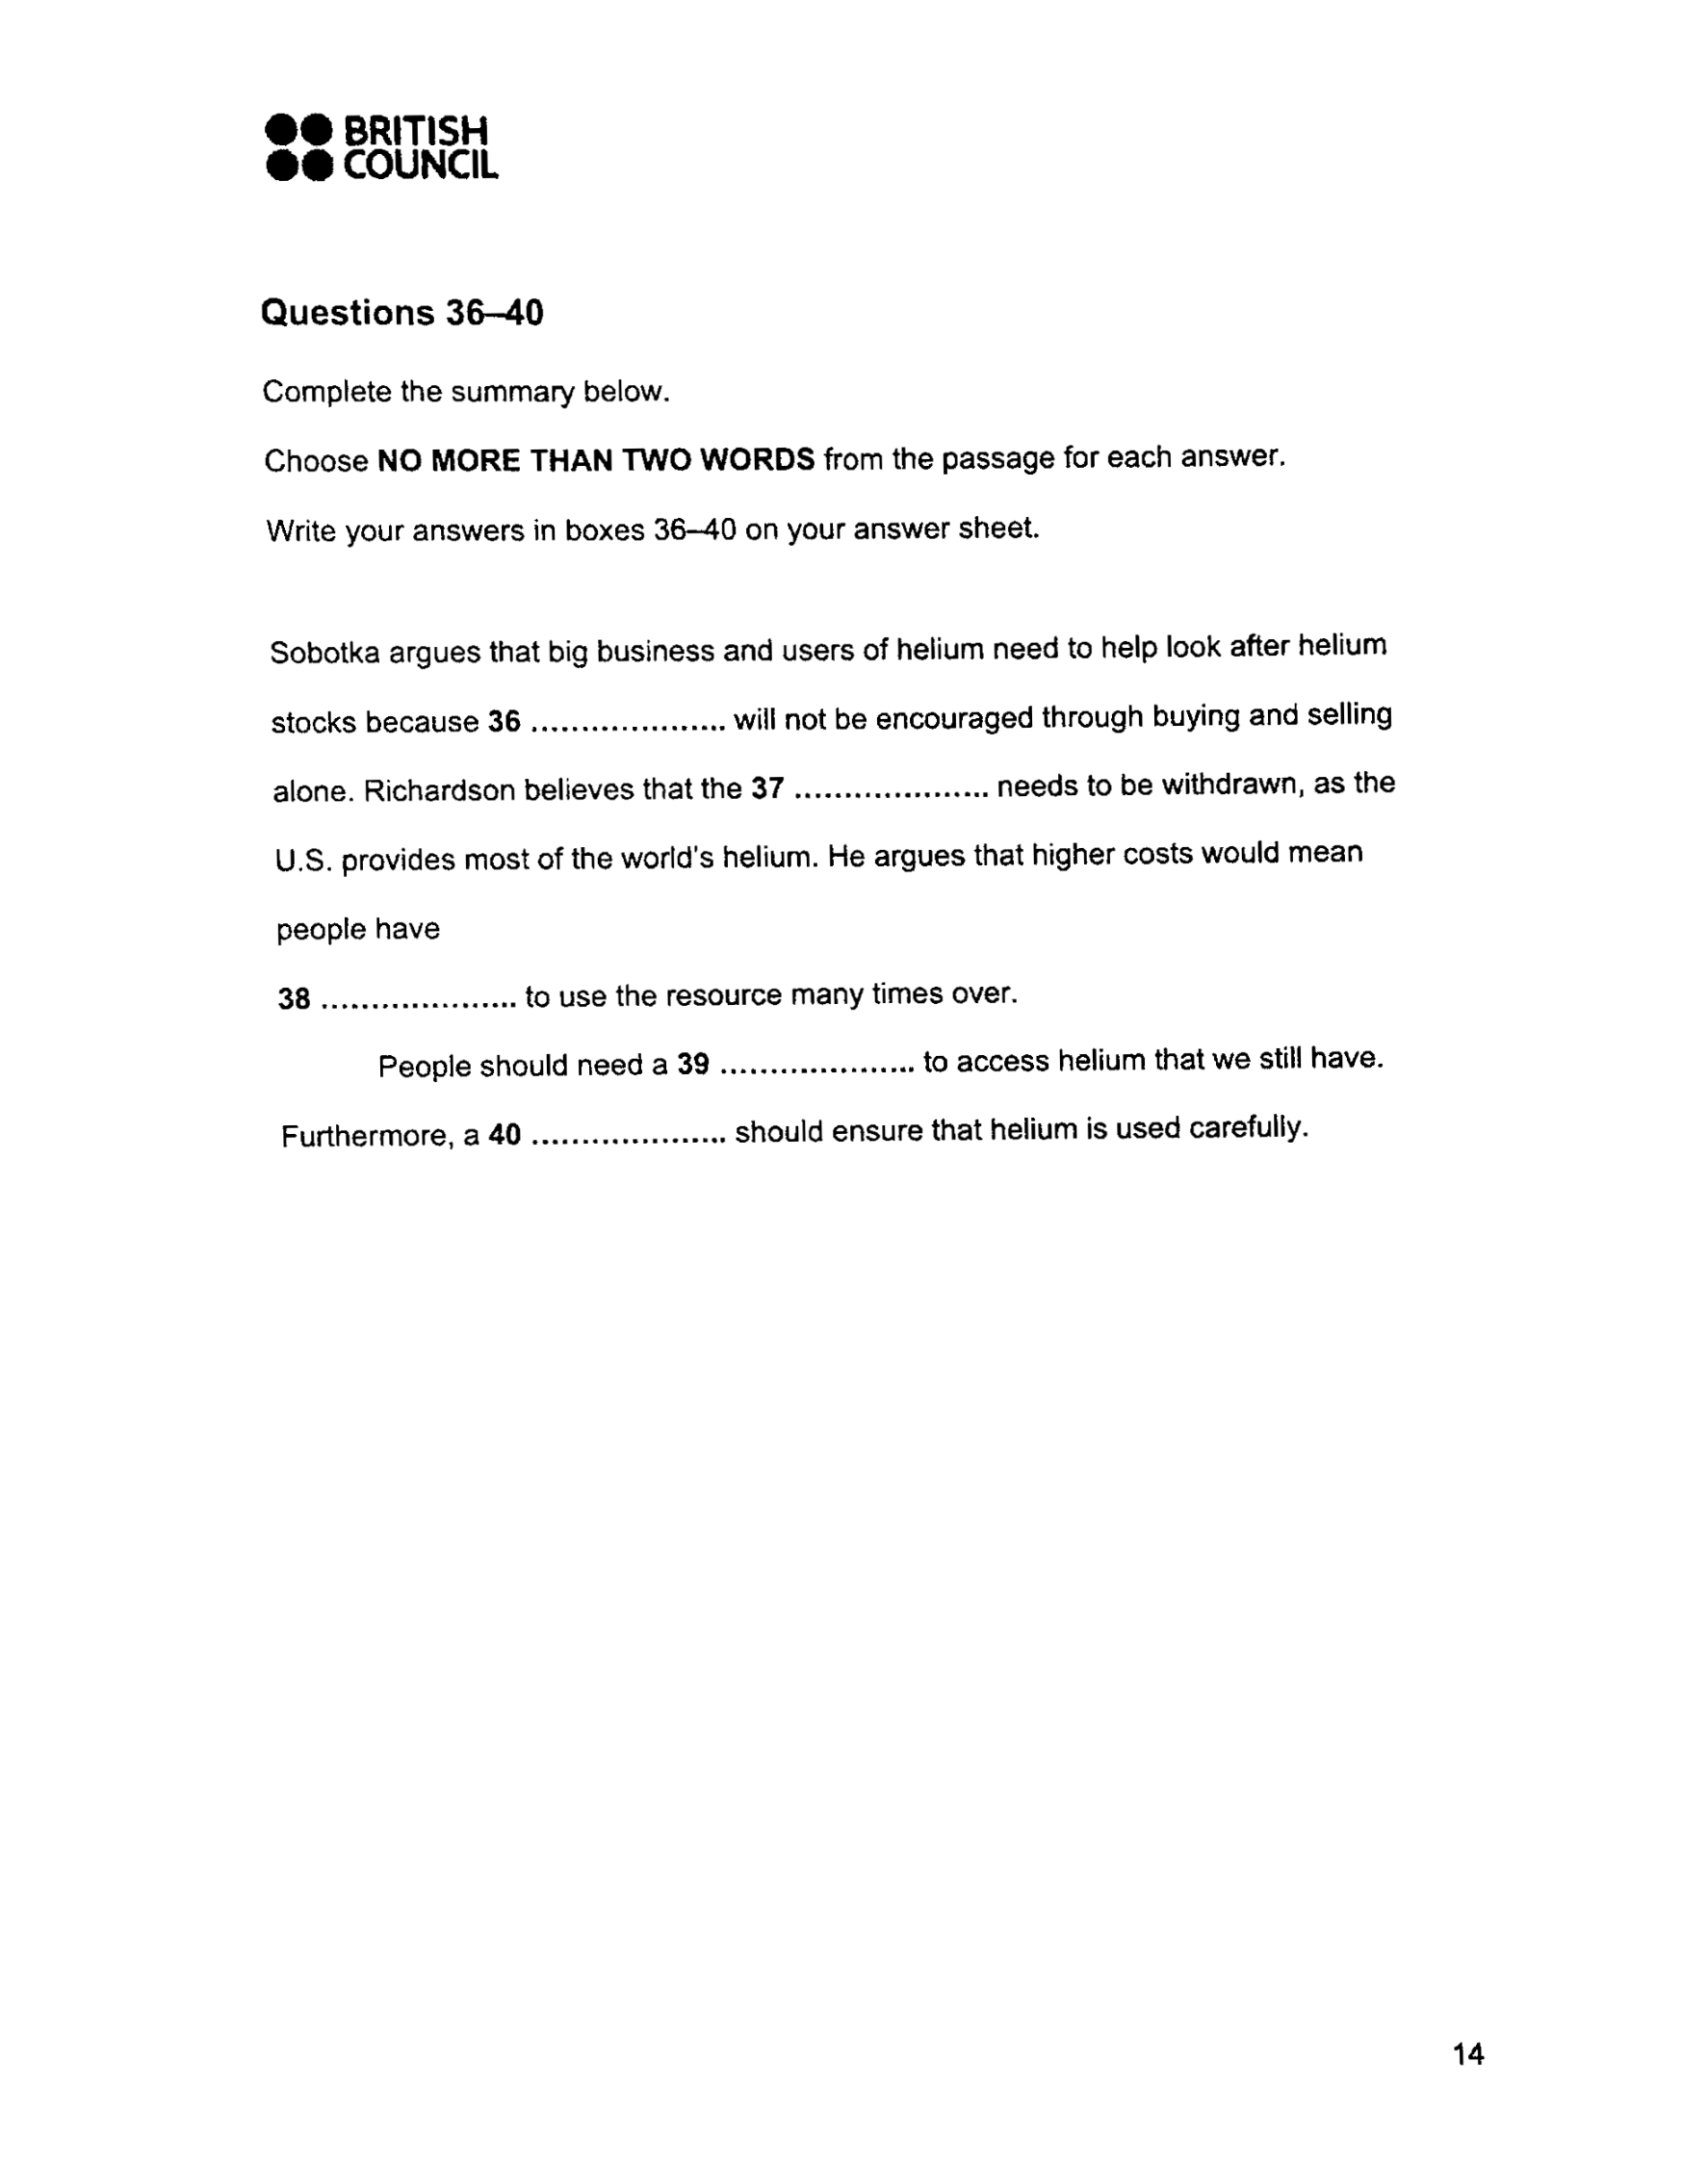

In [66]:
display('/Users/makhmood/PycharmProjects/nexus-test/nexus_test/samples/deskewed.png')

In [68]:
from pytesseract import Output
d = pytesseract.image_to_data(rotated, output_type=Output.DICT)


In [39]:
print(d)

{'level': [1, 2, 3, 4, 5, 5, 4, 5, 5, 2, 3, 4, 5, 5, 4, 5, 5, 5, 5, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 3, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 3, 4, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 

In [69]:
for i, l in enumerate(d['level']):
    if l <= 5:
        print(d['text'][i])





@@
BRITISH

@@
COUNCIL



Questions
36—40

Complete
the
summary
below.



Choose
NO
MORE
THAN
TWO
WORDS
from
the
passage
for
each
answer.



Write
your
answers
in
boxes
36-40
on
your
answer
sheet.



Sobotka
argues
that
big
business
and
users
of
helium
need
to
help
look
after
helium

Stocks
because
36
...........ceeeeeeee
will
not
be
encouraged
through
buying
and
selling

alone.
Richardson
believes
that
the
37
.........csesseeeee
needs
to
be
withdrawn,
as
the



U.S.
provides
most
of
the
world's
helium.
He
argues
that
higher
costs
would
mean



people
have

i}:
to
use
the
resource
many
times
over.


People
should
need
a
39
.........cseeeeeeeus
to
access
helium
that
we
still
have.

Furthermore,
2
40
.........cceeeeneeee
should
ensure
that
helium
is
used
carefully.



14


In [ ]:
post_proc = []
for 

In [21]:
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

In [133]:
img = cv2.imread('/Users/makhmood/PycharmProjects/nexus-test/nexus_test/samples/deskewed.png')

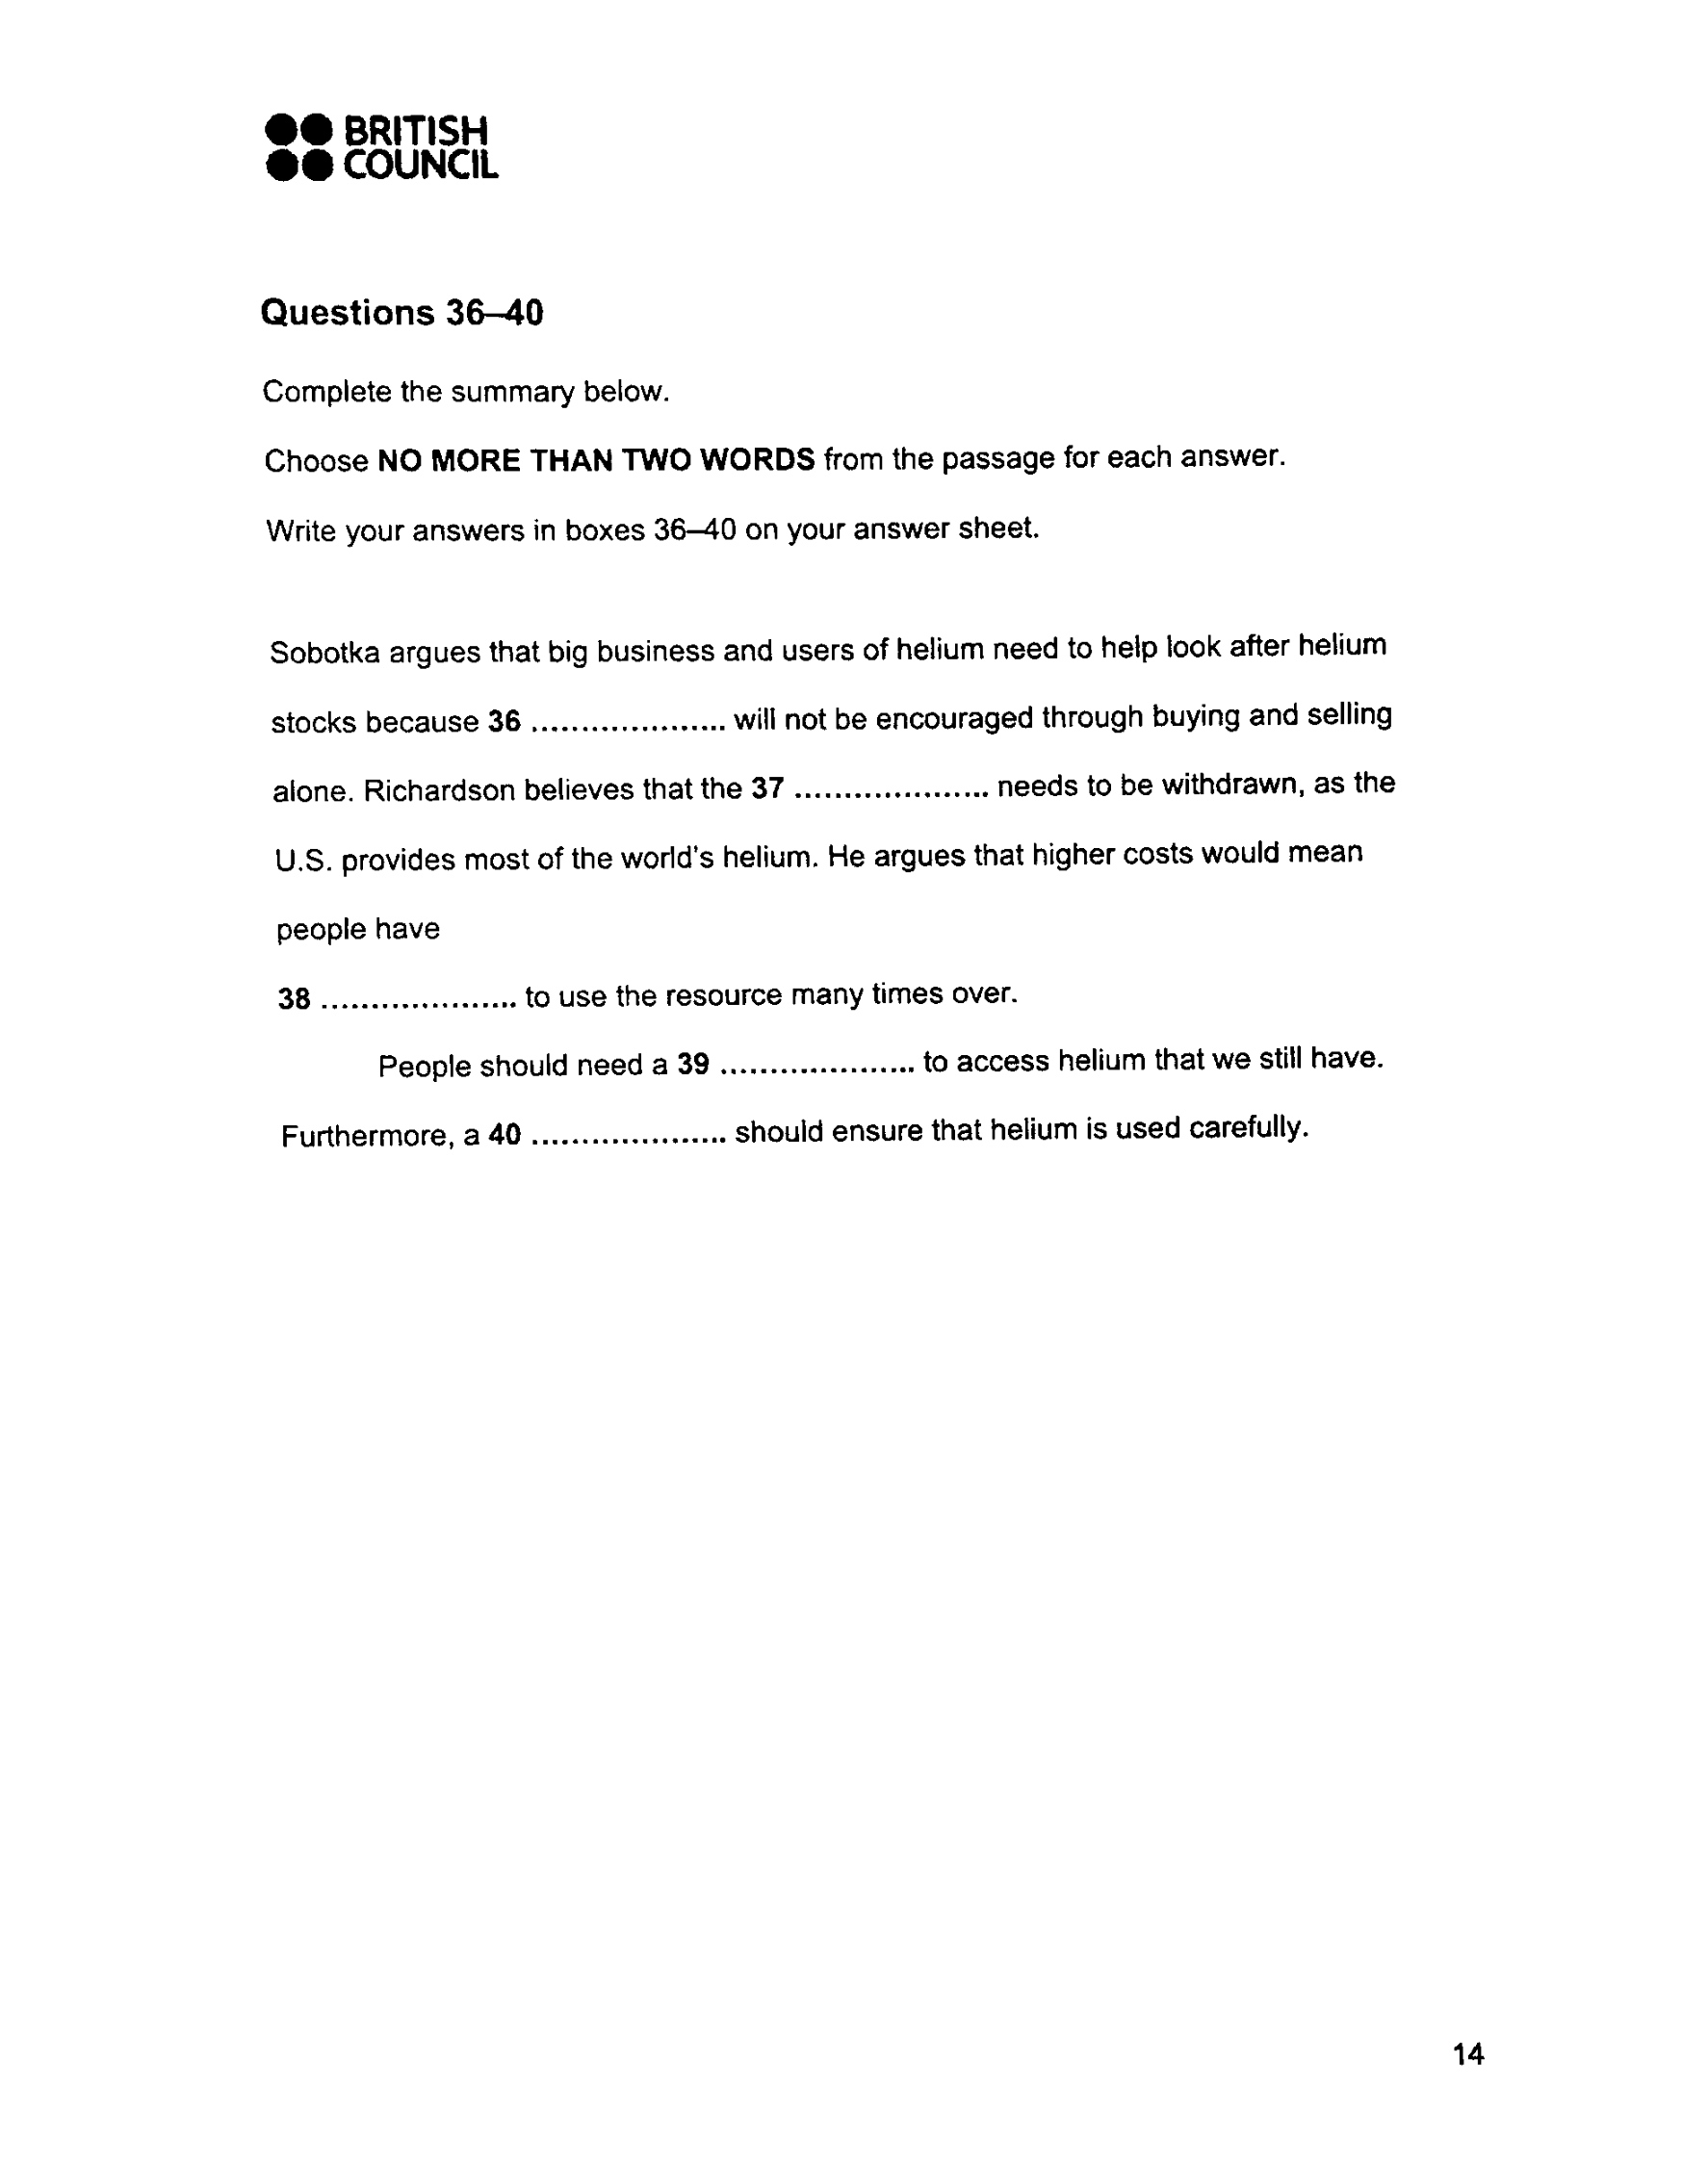

In [134]:
denoised = thresholding(get_grayscale(img))
cv2.imwrite('/Users/makhmood/PycharmProjects/nexus-test/nexus_test/samples/deskewed.png', denoised)
display('/Users/makhmood/PycharmProjects/nexus-test/nexus_test/samples/deskewed.png')

In [146]:
text = pytesseract.image_to_string(denoised)
print(text)

@@ BRITISH
@@ COUNCIL

Questions 36-40
Complete the summary below.

Choose NO MORE THAN TWO WORDS from the passage for each answer.

Write your answers in boxes 36-40 on your answer sheet.

Sobotka argues that big business and users of helium need to help look after helium
stocks because 36 ..........ecseeeeee will not be encouraged through buying and selling
alone. Richardson believes that the 37 .........sceeseeeees needs to be withdrawn, as the

U.S. provides most of the world’s helium. He argues that higher costs would mean

people have
3B eee ee eee en eee to use the resource many times over.

People should need 4 39 ..........:eeneeeeee to access helium that we still have.
Furthermore, a 40 ..........ccseseeens should ensure that helium is used carefully.

14



In [57]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /Users/makhmood/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [63]:
text.split()

['ccs',
 '@@',
 'BRITISH',
 '@@',
 'COUNCIL',
 'Questions',
 '36-40',
 'Complete',
 'the',
 'summary',
 'below.',
 'Choose',
 'NO',
 'MORE',
 'THAN',
 'TWO',
 'WORDS',
 'from',
 'the',
 'passage',
 'for',
 'each',
 'answer.',
 'Write',
 'your',
 'answers',
 'in',
 'boxes',
 '36-40',
 'on',
 'your',
 'answer',
 'sheet.',
 'Sobotka',
 'argues',
 'that',
 'big',
 'business',
 'and',
 'users',
 'of',
 'helium',
 'need',
 'to',
 'help',
 'look',
 'after',
 'helium',
 'stocks',
 'because',
 '36',
 '.............',
 'eee',
 'will',
 'not',
 'be',
 'encouraged',
 'through',
 'buying',
 'and',
 'selling',
 'alone.',
 'Richardson',
 'believes',
 'that',
 'the',
 '37',
 '........csscsseneee',
 'needs',
 'to',
 'be',
 'withdrawn,',
 'as',
 'the',
 'U.S.',
 'provides',
 'most',
 'of',
 'the',
 'world’s',
 'helium.',
 'He',
 'argues',
 'that',
 'higher',
 'costs',
 'would',
 'mean',
 'people',
 'have',
 'BB',
 'eect',
 'e',
 'eee',
 'eee',
 'to',
 'use',
 'the',
 'resource',
 'many',
 'times',
 'ove

In [138]:
text.split('\n')

['@@ BRITISH',
 '@@ COUNCIL',
 '',
 'Questions 36-40',
 'Complete the summary below.',
 '',
 'Choose NO MORE THAN TWO WORDS from the passage for each answer.',
 '',
 'Write your answers in boxes 36-40 on your answer sheet.',
 '',
 'Sobotka argues that big business and users of helium need to help look after helium',
 'stocks because 36 ..........ecseeeeee will not be encouraged through buying and selling',
 'alone. Richardson believes that the 37 .........sceeseeeees needs to be withdrawn, as the',
 '',
 'U.S. provides most of the world’s helium. He argues that higher costs would mean',
 '',
 'people have',
 '3B eee ee eee en eee to use the resource many times over.',
 '',
 'People should need 4 39 ..........:eeneeeeee to access helium that we still have.',
 'Furthermore, a 40 ..........ccseseeens should ensure that helium is used carefully.',
 '',
 '14',
 '\x0c']

In [147]:
import regex
den_text=[]
for word in text.split():
    rx = re.compile(r'(.)\1{2,}')
    rxx = rx.search(word)
    if not rxx:
        den_text.append(word)
    else:
        den_text.append('.....')

In [148]:
' '.join(den_text)

'@@ BRITISH @@ COUNCIL Questions 36-40 Complete the summary below. Choose NO MORE THAN TWO WORDS from the passage for each answer. Write your answers in boxes 36-40 on your answer sheet. Sobotka argues that big business and users of helium need to help look after helium stocks because 36 ..... will not be encouraged through buying and selling alone. Richardson believes that the 37 ..... needs to be withdrawn, as the U.S. provides most of the world’s helium. He argues that higher costs would mean people have 3B ..... ee ..... en ..... to use the resource many times over. People should need 4 39 ..... to access helium that we still have. Furthermore, a 40 ..... should ensure that helium is used carefully. 14'

In [188]:
png_path = '/Users/makhmood/PycharmProjects/nexus-test/nexus_test/samples/82251504.png'
image = thresholding(get_grayscale(cv2.imread(png_path)))
# grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
angle = determine_skew(img)
rotated = rota(image, angle, (255, 255, 255))
cv2.imwrite('/Users/makhmood/PycharmProjects/nexus-test/nexus_test/samples/deskewed_png.png', rotated)

AttributeError: dtype

In [189]:
image = Image.open(png_path)  
# image.show()  
img = cv2.cvtColor(numpy.asarray(image),cv2.COLOR_RGB2BGR)  
# cv2.imshow("OpenCV",img)  
# cv2.waitKey()  

In [194]:
def pil_to_cv(pil_image):
    return cv2.cvtColor(np.asarray(pil_image), cv2.COLOR_RGB2BGR)  

image = Image.open(png_path)
remove_noise(dilate(pil_to_cv(image)))

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [186]:
from PIL import Image

png_path = '/Users/makhmood/PycharmProjects/nexus-test/nexus_test/samples/82251504.png'
img = Image.open(png_path)
print(img)
cv2.imwrite('/Users/makhmood/PycharmProjects/nexus-test/nexus_test/samples/deskewed_png.png', denoised)
print(img.info)

<PIL.PngImagePlugin.PngImageFile image mode=L size=754x1000 at 0x7F8C41B0AC40>
{}


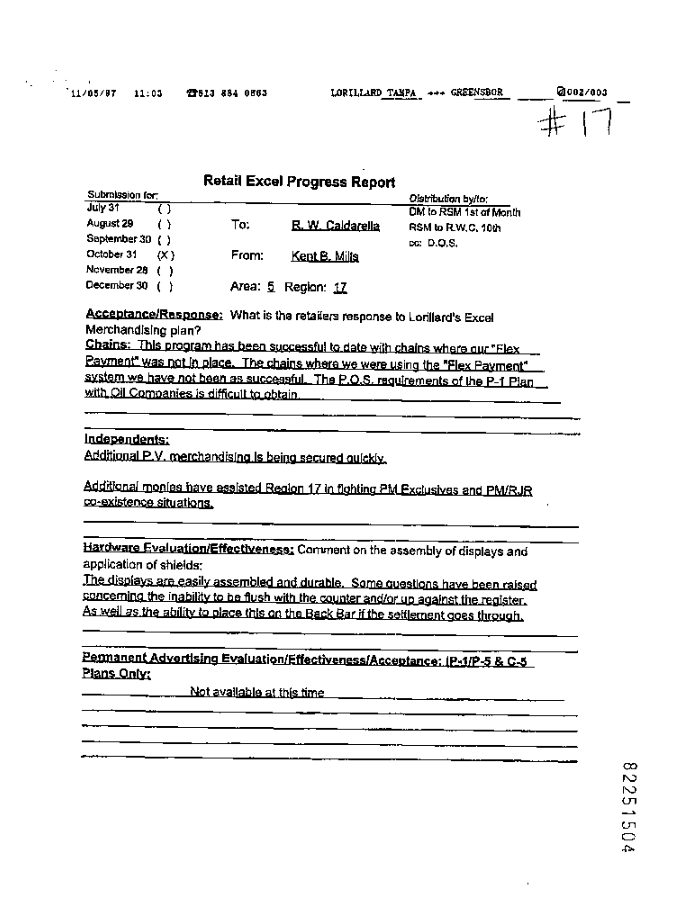

In [175]:
png_path = '/Users/makhmood/PycharmProjects/nexus-test/nexus_test/samples/82251504.png'
img = cv2.imread(png_path)

# denoised = thresholding(get_grayscale(img))
cv2.imwrite('/Users/makhmood/PycharmProjects/nexus-test/nexus_test/samples/deskewed_png.png', denoised)
display('/Users/makhmood/PycharmProjects/nexus-test/nexus_test/samples/deskewed_png.png')

In [178]:
den_png_path = '/Users/makhmood/PycharmProjects/nexus-test/nexus_test/samples/deskewed_png.png'
img = cv2.imread(den_png_path)
denoised = img
display(denoised)

AttributeError: 'numpy.ndarray' object has no attribute 'read'

In [163]:
text = pytesseract.image_to_string(denoised)
print(text)

“11/08/07 11:03 wees 884 oses LORILLARDTANPA. +++ GREENSBOR @o02/003

 

Retail Excel Progress Report

Submission for: Distribution by/to:
‘iy 37 Oo OM to RSM 1st of Month
August29() To: B.W.Caldarella RSM to RW.C, 10th
September 30 ( ) oo: DOS.

October31 (X) From: Kent B, Mills

November28 ( )

December30 ( ) Area: § Region: 17

Acceptance/Response: What
Merchandising pian?

 
  

the retailers response to Lorillard's Excel

  

 

 

 

 

Hardware Evaluation/Effectiveness: Comment on the essembly of displays and

application of shields:

 

 

 

 

 

 

 

+

vOSLSZZ8



In [73]:
from nltk.corpus import words

den_text = []
for w in text.split():
    if w.isalpha() and (w.lower() in words.words()):
        den_text.append(w)
    else:
        den_text.append('...')

In [74]:
" ".join(den_text)

'... ... ... ... COUNCIL ... ... Complete the summary below. Choose NO MORE THAN TWO ... from the passage for each answer. Write your answers in ... ... on your answer sheet. ... argues that big business and users of helium need to help look after helium stocks because 36 ... ... will not be encouraged through ... and selling alone. ... believes that the 37 ... needs to be withdrawn, as the ... provides most of the ... helium. He argues that higher costs would mean people have BB ... e ... ... to use the resource many times over. People should need a 39 ... ... to access helium that we still have. ... a 40 ... should ensure that helium is used carefully. 14'

In [9]:
import matplotlib.pyplot as plt
def display(im_path: str) -> None:
    """
    :param im_path: Path of the input image to be displayed
    :return: Inline image in Jupyter Notebook with actual size
    """

    dpi = 80
    im_data = plt.imread(im_path)

    height, width = im_data.shape[:2]

    figsize = width / float(dpi), height / float(dpi)

    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    ax.axis('off')

    ax.imshow(im_data, cmap='gray')

    plt.show()
